In [1]:
import cv2
import matplotlib.pyplot as plt
import hdf5storage as h5
import numpy as np
import os

In [2]:
ROOT = 'D:/doc3d-dataset'
FNAME = '1000_4-pp_Page_847-Pwi0001'
#file locates in folder '4'

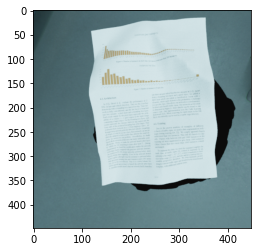

In [3]:
img_path = os.path.join(ROOT, 'img', FNAME + '.png')
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

(448, 448, 3)


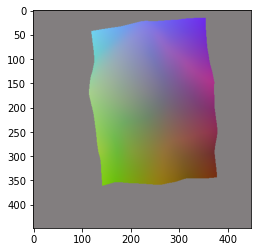

In [4]:
wc_path = os.path.join(ROOT, 'wc', FNAME + '.exr')
wc = cv2.imread(wc_path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
print(wc.shape)
xmx, xmn, ymx, ymn,zmx, zmn= 1.2539363, -1.2442188, 1.2396319, -1.2289206, 0.6436657, -0.67492497
wc[:,:,0]= (wc[:,:,0]-zmn)/(zmx-zmn)
wc[:,:,1]= (wc[:,:,1]-ymn)/(ymx-ymn)
wc[:,:,2]= (wc[:,:,2]-xmn)/(xmx-xmn)
plt.imshow(wc)
plt.show()

(448, 448, 2)


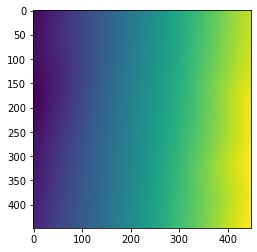

In [5]:
bm_path = os.path.join(ROOT, 'bm', FNAME + '.mat')
bm = h5.loadmat(bm_path)['bm']
print(bm.shape)
plt.imshow(bm[:,:,0])
plt.show()

(448, 448, 3)


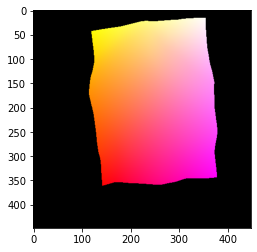

In [6]:
uv_path = os.path.join(ROOT, 'uv', FNAME + '.exr')
uv = cv2.imread(uv_path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
print(uv.shape)
plt.imshow(uv)
plt.show()

(448, 448, 3)


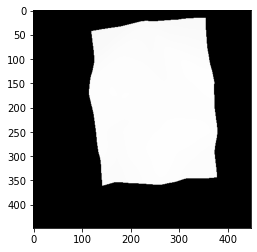

In [7]:
dmap_path = os.path.join(ROOT, 'dmap', FNAME + '.exr')
dmap = cv2.imread(dmap_path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
print(dmap.shape)
dmap[dmap>30.0] = 30
dmap = 1 - ((dmap-np.min(dmap))/(np.max(dmap)-np.min(dmap)))
plt.imshow(dmap)
plt.show()

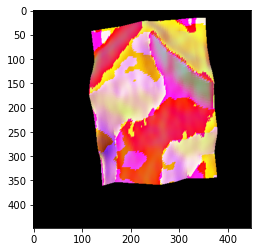

In [8]:
import numpy as np
norm_path = os.path.join(ROOT, 'norm', FNAME + '.exr')
norm = cv2.imread(norm_path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
plt.imshow((norm * 255).astype(np.uint8))
plt.show()

(448, 448, 3)


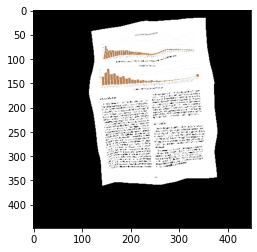

In [9]:
alb_path = os.path.join(ROOT, 'alb', FNAME + '.png')
alb = cv2.imread(alb_path)
print(alb.shape)
plt.imshow(alb)
plt.show()

(448, 448, 3)


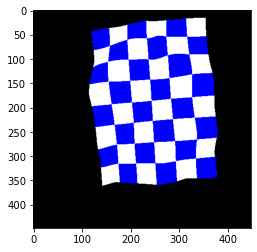

In [10]:
recon_path = os.path.join(ROOT, 'recon', FNAME[:-4] + 'chess480001.png')
recon = cv2.imread(recon_path)
print(recon.shape)
plt.imshow(recon)
plt.show()

In [11]:
import torch
import torch.nn.functional as F

In [17]:
_bm = bm / np.array([448, 448])
_bm = (_bm - 0.5) * 2
_bm = np.reshape(_bm, (1, 448, 448, 2))
_bm = torch.from_numpy(_bm).float()
_img = img.transpose((2, 0, 1)).astype(np.float32)/255.0
_img = np.expand_dims(_img, 0)
_img = torch.from_numpy(_img)
uw = F.grid_sample(_img, _bm, mode='bilinear', align_corners=True)
uw = uw[0].numpy().transpose((1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


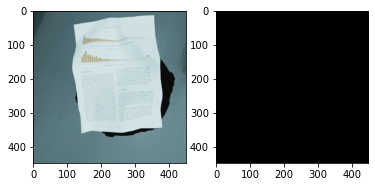

In [18]:
_, axis = plt.subplots(1, 2)
axis[0].imshow(img)
axis[1].imshow(uw)
plt.show()